# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
# Your code here
boston=pd.read_csv(r"C:\Users\osile\Downloads\boston_data.csv")
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [5]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [6]:
boston.shape

(404, 14)

In [16]:
boston.nunique()

crim       402
zn          25
indus       69
chas         2
nox         76
rm         363
age        298
dis        339
rad          9
tax         61
ptratio     45
black      292
lstat      366
medv       200
dtype: int64

In [18]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [19]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [13]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000


In [15]:
desc = boston["medv"].describe()
desc

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

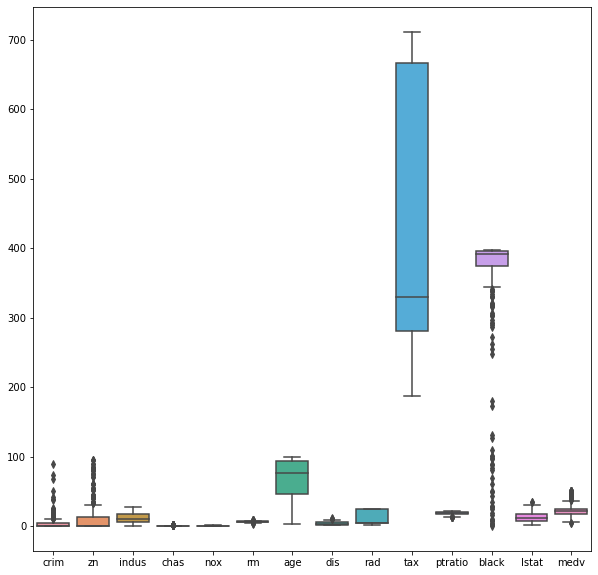

In [31]:
#outliers
plt.figure(figsize=(10, 10))
sns.boxplot(data=boston)

In [38]:
#outliers
stats = boston.describe().transpose()

stats['IQR'] = stats['75%'] - stats['25%']
outliers = pd.DataFrame(columns=boston.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 6
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = boston[(boston[col] < lower) | 
                   (boston[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)

C:\Users\osile\AppData\Local\Temp\ipykernel_8748\3835560807.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\osile\AppData\Local\Temp\ipykernel_8748\3835560807.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\osile\AppData\Local\Temp\ipykernel_8748\3835560807.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\osile\AppData\Local\Temp\ipykernel_8748\3835560807.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\osile\AppData\Local\Temp\ipykernel_8748

In [39]:
outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Outlier
34,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0,crim
114,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0,crim
116,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5,crim
273,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9,crim
285,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8,crim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,9.51363,0.0,18.1,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9,black
355,14.4208,0.0,18.1,0.0,0.74,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,black
374,7.36711,0.0,18.1,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0,black
383,5.58107,0.0,18.1,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3,black


In [49]:
#droping outliers  from dataframe
z= outliers.drop('Outlier', axis=1)

In [50]:
#checking if dropped
z

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
34,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0
114,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
116,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
273,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9
285,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,9.51363,0.0,18.1,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
355,14.4208,0.0,18.1,0.0,0.74,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6
374,7.36711,0.0,18.1,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0
383,5.58107,0.0,18.1,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22,14.3


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [51]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


<AxesSubplot:>

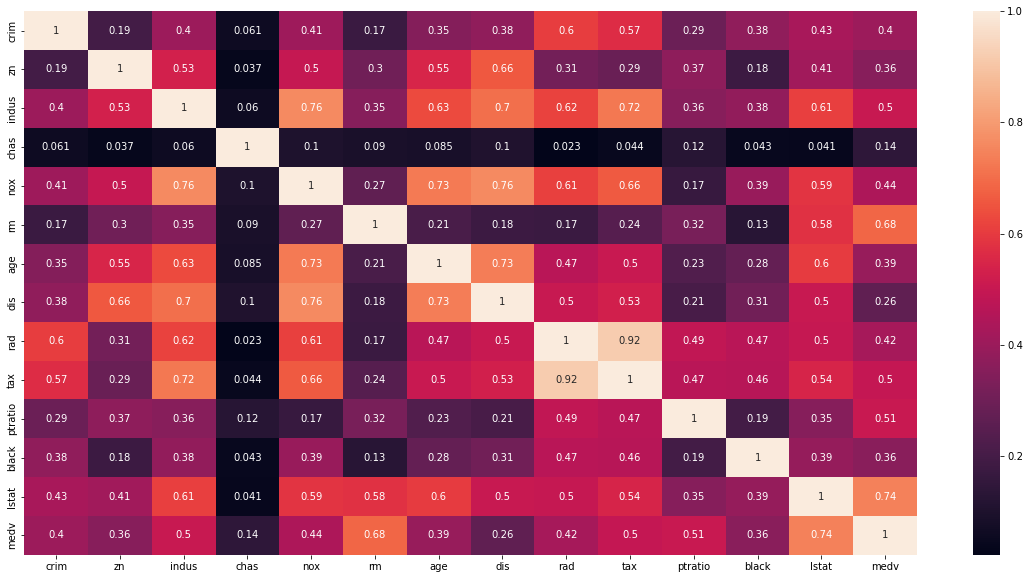

In [52]:
# Your plots here
plt.figure(figsize=(20, 10))
sns.heatmap(boston.corr().abs(),  annot=True)

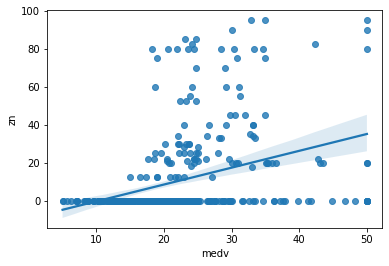

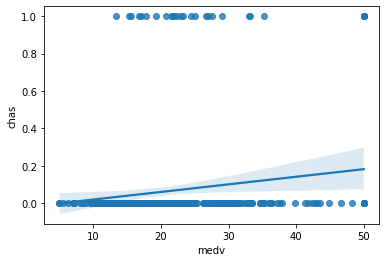

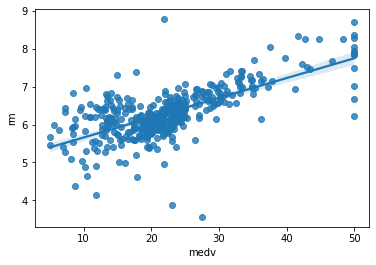

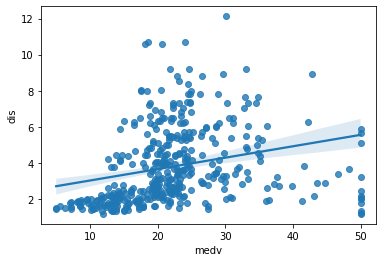

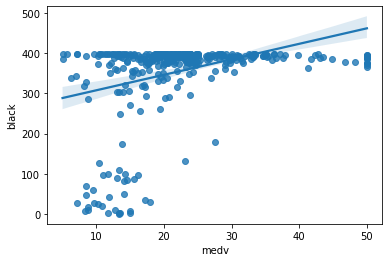

In [53]:
# Your response here
# from the correlation matrix above it looks that there might be a high correlation between medv and columns: zn, chas, rm, dis and black.
# The graphs below show this relations:
for name in ['zn', 'chas', 'rm', 'dis','black']:
    sns.regplot(x='medv', y=name, data=boston)
    plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [58]:
print('positive correlation between rm, dis and the price, meaning that if the price increases then the values of rm and dis increase as well')

positive correlation between rm, dis and the price, meaning that if the price increases then the values of rm and dis increase as well


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# Your response here

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [ ]:
# Your code here

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [59]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:result = r2_score(y_true, y_predict)
    result = r2_score(y_true, y_predict)
    return result  

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [62]:
# Your code here
from sklearn.model_selection import train_test_split
y = boston['medv']
x = boston.drop(labels='medv', axis=1)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state = 15)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [63]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

max_depth = [2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

Now, plot the score for each tree on the training set and on the testing set.

In [64]:
# Produce a plot with the score for the testing and training for the different max depths
trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

In [66]:
boston_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)

In [67]:
boston_score

,train,test
2,0.786041,0.723040
4,0.912285,0.858954
6,0.956058,0.882062
8,0.969403,0.885172
10,0.975678,0.868933


<AxesSubplot:>

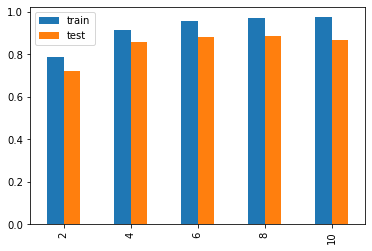

In [68]:
boston_score.plot.bar()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [71]:
from sklearn.metrics import explained_variance_score
# Your response here
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = explained_variance_score(y_true, y_predict)
    return result

<AxesSubplot:>

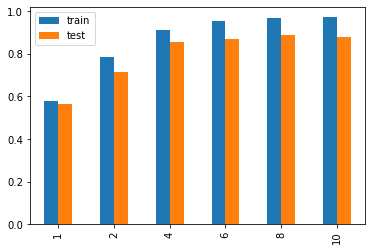

In [72]:
max_depth = [1,2,4,6,8,10]

y_predictions_train={}
y_predictions_test={}

for num in max_depth:
    rfr = RandomForestRegressor(max_depth=num)
    rfr.fit(x_train, y_train)
    key = 'rfr_depth' + str(num)
    y_predictions_train[key]= rfr.predict(x_train)
    y_predictions_test[key]= rfr.predict(x_test)

trains_scores = []
for key in y_predictions_train:
    trains_scores.append(performance_metric(y_true=y_train, y_predict=y_predictions_train[key]))

test_scores = []
for key in y_predictions_test:
    test_scores.append(performance_metric(y_true=y_test, y_predict=y_predictions_test[key]))

df_score = pd.DataFrame({'train': trains_scores, 'test': test_scores}, index=max_depth)
df_score.plot.bar()

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here